# Exercise 10. Web Analytics

In this exercise we will use the Online Shopper's Intention dataset from Kaggle (https://www.kaggle.com/roshansharma/online-shoppers-intention). It covers 12,330 sessions on contains multiple web analytics metrics, some technical details such as 'operating system' and whether a session generated revenue or not.

We can use the dataset to see which type of customers (based on their web analytics information) generate revenue. After knowing this, we can develop ways to encourage more customers to generate revenue (e.g. by staying longer on a certain page).

We will first conduct data analysis and then build a classification model to predict revenue.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import pakages
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import distplot
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

## 1. Data Analysis

In [ ]:
# Download dataset from https://www.kaggle.com/roshansharma/online-shoppers-intention
# Load the dataset in a data frame
df = pd.read_csv('/content/drive/MyDrive/TWSM_Data/online_shoppers_intention.csv')
df.shape

(12330, 18)

In [ ]:
# Remove NAs
df = df.dropna()
df.shape

(12316, 18)

In [ ]:
df.describe().loc[['min','max']]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
min,0.0,-1.00,0.0,-1.000,0.0,-1.00000,0.0,0.0,0.000000,0.0,1.0,1.0,1.0,1.0
max,27.0,3398.75,24.0,2549.375,705.0,63973.52223,0.2,0.2,361.763742,1.0,8.0,13.0,9.0,20.0


All the 'Duration' variables start at -1, but should start at zero. The maximum of 'ProductRelated_Duration' is very high (outliers).

In [ ]:
df=df[df['ProductRelated_Duration'].between(0, df['ProductRelated_Duration'].quantile(.99))]

In [ ]:
df_rev=df[df.Revenue==True]

In [ ]:
df_rev[df_rev.BounceRates>0.1]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
6700,0.0,0.0,0.0,0.0,1.0,0.00,0.200000,0.200000,0.0,0.0,Oct,2,5,1,20,Returning_Visitor,False,True
7600,0.0,0.0,0.0,0.0,3.0,0.00,0.200000,0.200000,0.0,0.0,Nov,3,2,1,11,Returning_Visitor,False,True
8106,2.0,256.5,0.0,0.0,10.0,117.25,0.110714,0.130952,0.0,0.0,Nov,2,2,7,11,Returning_Visitor,True,True
10789,1.0,0.0,0.0,0.0,1.0,0.00,0.200000,0.200000,0.0,0.0,Nov,3,2,3,8,Returning_Visitor,False,True


In [ ]:
df.describe().loc[['min','max']]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
min,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,1.0,1.0,1.0,1.0
max,24.0,2720.5,16.0,2252.033333,351.0,8699.407065,0.2,0.2,361.763742,1.0,8.0,13.0,9.0,20.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

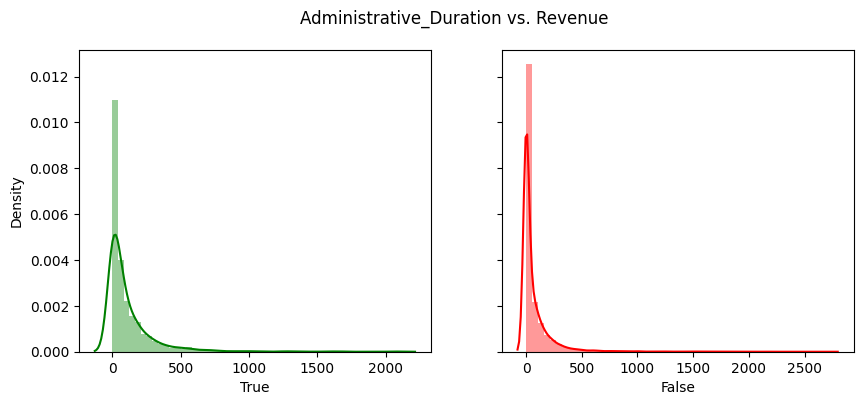

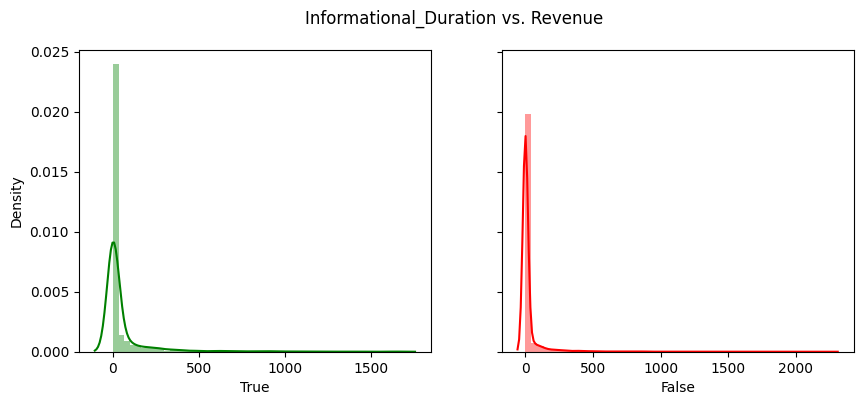

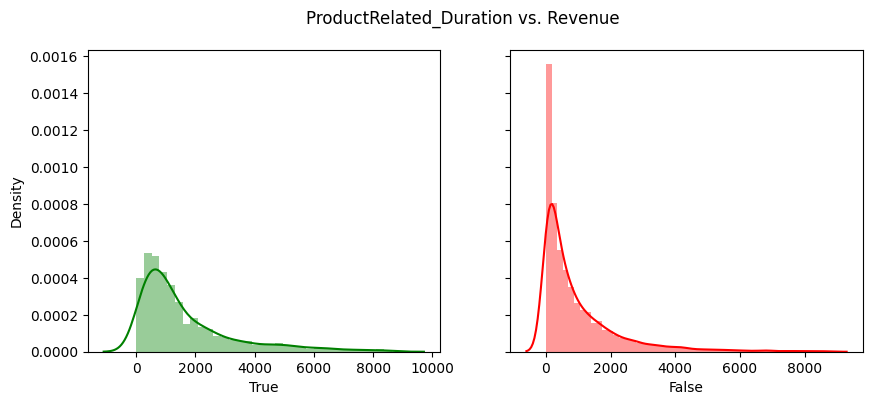

In [ ]:
# Distribution of the time for adminstrative pages for different revenue values
#sharey=True share axes y properties

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True, dpi=100)
fig.suptitle('Administrative_Duration vs. Revenue')
distplot(df.loc[df.Revenue==True, "Administrative_Duration"]  , color="green", ax=axes[0], axlabel='True')
distplot(df.loc[df.Revenue==False, "Administrative_Duration"] , color="red", ax=axes[1], axlabel='False')

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True, dpi=100)
fig.suptitle('Informational_Duration vs. Revenue')
distplot(df.loc[df.Revenue==True, "Informational_Duration"]  , color="green", ax=axes[0], axlabel='True')
distplot(df.loc[df.Revenue==False, "Informational_Duration"] , color="red", ax=axes[1], axlabel='False')

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True, dpi=100)
fig.suptitle('ProductRelated_Duration vs. Revenue')
distplot(df.loc[df.Revenue==True, "ProductRelated_Duration"]  , color="green", ax=axes[0], axlabel='True')
distplot(df.loc[df.Revenue==False, "ProductRelated_Duration"] , color="red", ax=axes[1], axlabel='False')

Seems that customers generating revenue spend more time on product related and (partly) administartive pages, but less on informational pages. This is without considering extreme cases (e.g. page left open and doing something else on PC).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

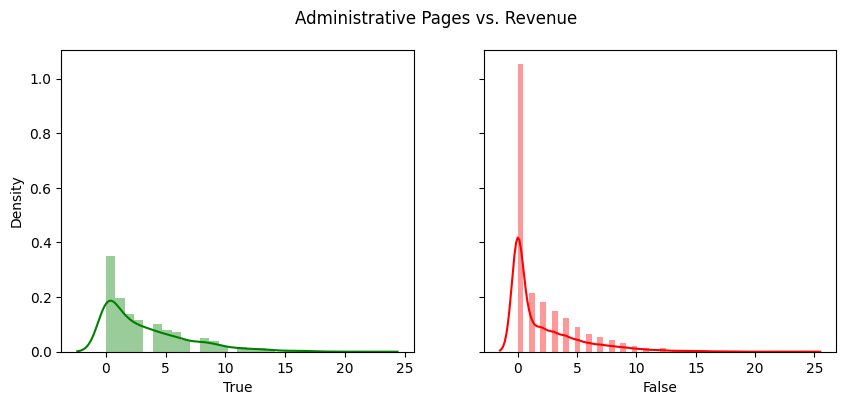

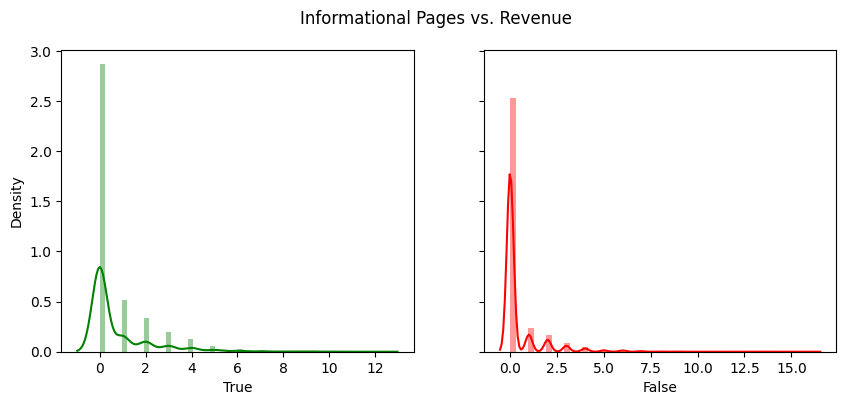

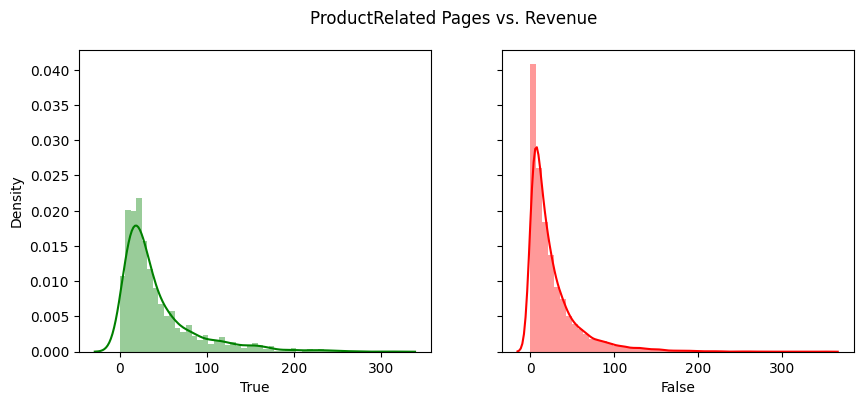

In [ ]:
# Distribution of the time for adminstrative pages for different revenue values
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True, dpi=100)
fig.suptitle('Administrative Pages vs. Revenue')
distplot(df.loc[df.Revenue==True, "Administrative"]  , color="green", ax=axes[0], axlabel='True')
distplot(df.loc[df.Revenue==False, "Administrative"] , color="red", ax=axes[1], axlabel='False')

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True, dpi=100)
fig.suptitle('Informational Pages vs. Revenue')
distplot(df.loc[df.Revenue==True, "Informational"]  , color="green", ax=axes[0], axlabel='True')
distplot(df.loc[df.Revenue==False, "Informational"] , color="red", ax=axes[1], axlabel='False')

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True, dpi=100)
fig.suptitle('ProductRelated Pages vs. Revenue')
distplot(df.loc[df.Revenue==True, "ProductRelated"]  , color="green", ax=axes[0], axlabel='True')
distplot(df.loc[df.Revenue==False, "ProductRelated"] , color="red", ax=axes[1], axlabel='False')

Customers gerating revenues spend more time on administartive pages, less on informational pages and more on product related pages.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

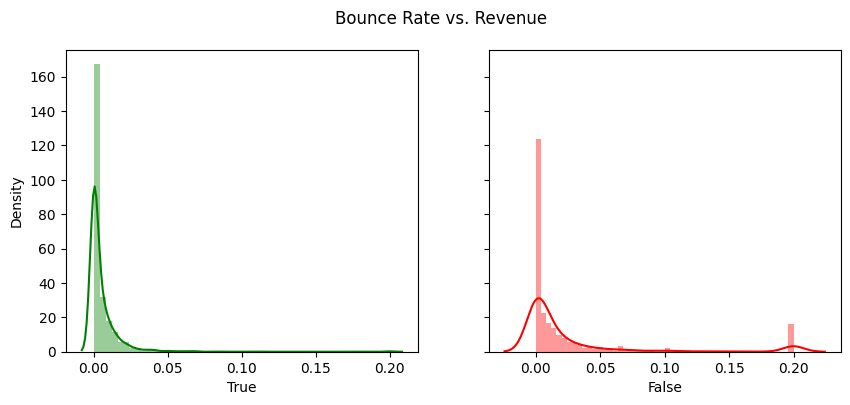

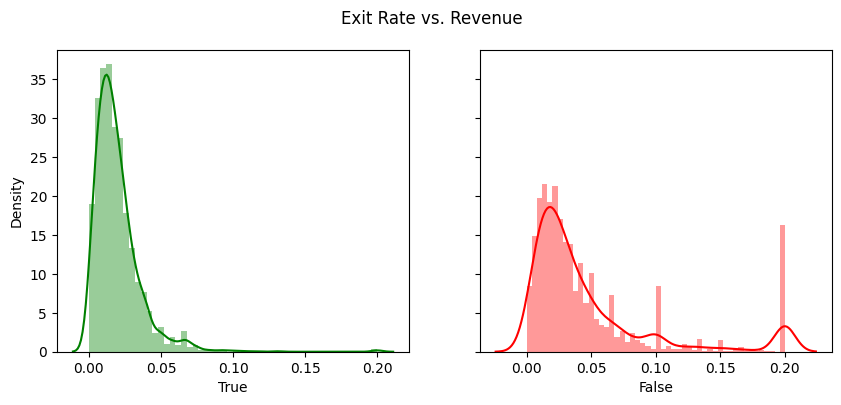

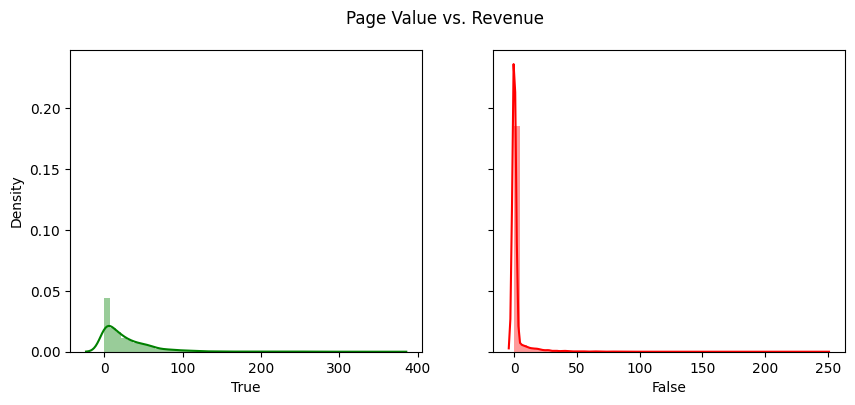

In [ ]:
# Distribution of the time for adminstrative pages for different revenue values
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True, dpi=100)
fig.suptitle('Bounce Rate vs. Revenue')
distplot(df.loc[df.Revenue==True, "BounceRates"]  , color="green", ax=axes[0], axlabel='True')
distplot(df.loc[df.Revenue==False, "BounceRates"] , color="red", ax=axes[1], axlabel='False')

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True, dpi=100)
fig.suptitle('Exit Rate vs. Revenue')
distplot(df.loc[df.Revenue==True, "ExitRates"]  , color="green", ax=axes[0], axlabel='True')
distplot(df.loc[df.Revenue==False, "ExitRates"] , color="red", ax=axes[1], axlabel='False')

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True, dpi=100)
fig.suptitle('Page Value vs. Revenue')
distplot(df.loc[df.Revenue==True, "PageValues"]  , color="green", ax=axes[0], axlabel='True')
distplot(df.loc[df.Revenue==False, "PageValues"] , color="red", ax=axes[1], axlabel='False')

For customers generating revenues, te bounce rate and the exit rate are lower, while the page value is higher.

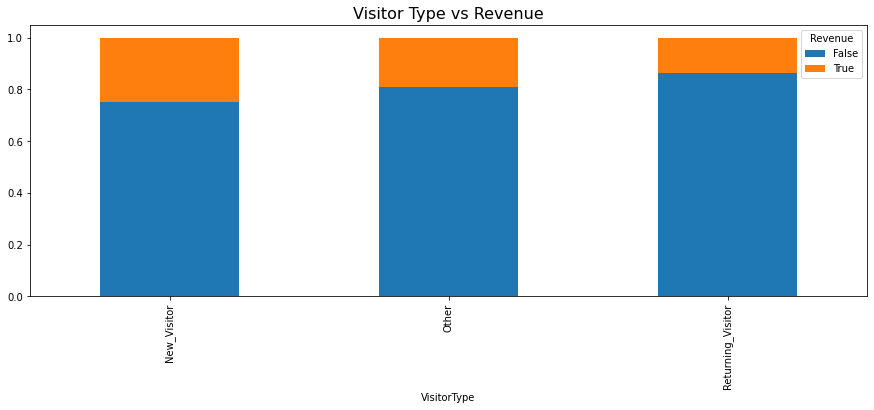

In [ ]:
df1 = pd.crosstab(df['VisitorType'], df['Revenue'])
df1.div(df1.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5))
plt.title('Visitor Type vs Revenue', fontsize = 16)
plt.show()

New visitors buy more often than returning visitors. 

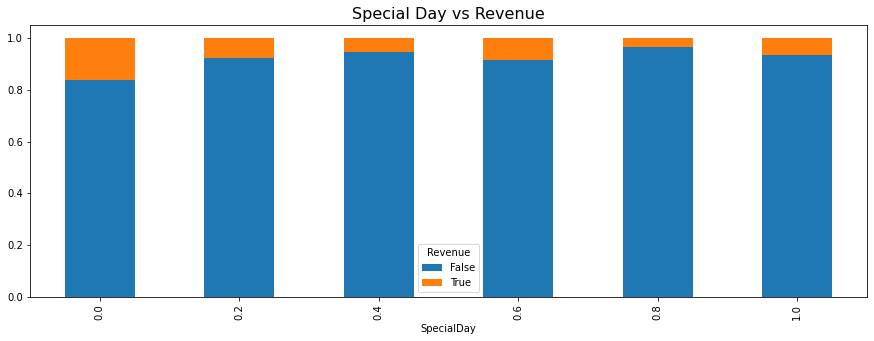

In [ ]:
df1 = pd.crosstab(df['SpecialDay'], df['Revenue'])
df1.div(df1.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5))
plt.title('Special Day vs Revenue', fontsize = 16)
plt.show()

Not really clear relationship.

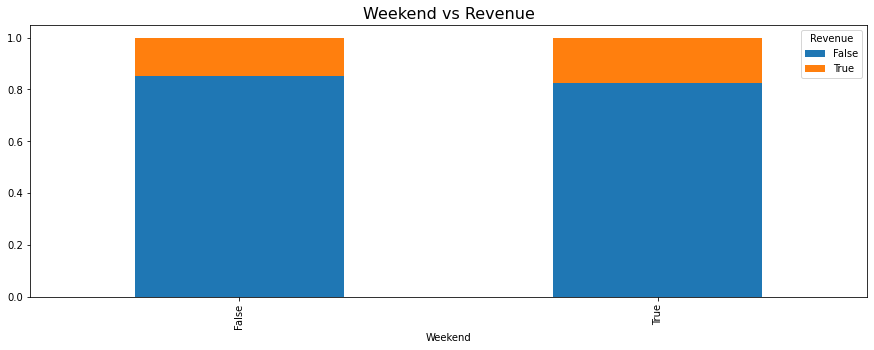

In [ ]:
df1 = pd.crosstab(df['Weekend'], df['Revenue'])
df1.div(df1.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5))
plt.title('Weekend vs Revenue', fontsize = 16)
plt.show()

Not really clear relationship. The following variables are expected to have high explanatory value towards Revenue:

* PageValue
* ExitRate
* BounceRate
* ProductRelated (Duration)
* Administartive (Duration)

## 2. Classification

In this section we will build a random forest classifier to predict revenue with Gridsearch cross validation. We will encode categorical variables beforehand.

In [ ]:
# Encoding categorical variables in dummies, here Month and VisitorType.
data1 = pd.get_dummies(df)
list(data1)

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'Weekend',
 'Revenue',
 'Month_Aug',
 'Month_Dec',
 'Month_Feb',
 'Month_Jul',
 'Month_June',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'Month_Oct',
 'Month_Sep',
 'VisitorType_New_Visitor',
 'VisitorType_Other',
 'VisitorType_Returning_Visitor']

In [ ]:
# Define dependent and independent variables

x = data1.drop(['Revenue'], axis = 1)
y = data1['Revenue']

# Split into Training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 12)


In [ ]:
# Random forest model
rf = RandomForestClassifier(random_state = 12)
param_grid = {
    'min_samples_leaf': [2, 3, 4, 5],
    'n_estimators': [10,50,100, 200, 300, 1000]
}

# Grud search
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)
grid_search.fit(x_train, y_train)

y_pred = grid_search.predict(x_test)

# Model performance

print("Training Accuracy :", grid_search.best_estimator_.score(x_train, y_train))
print("Testing Accuracy :", grid_search.best_estimator_.score(x_test, y_test))

print(classification_report(y_test, y_pred))

Training Accuracy : 0.963092423152051
Testing Accuracy : 0.9115953947368421
              precision    recall  f1-score   support

       False       0.93      0.97      0.95      2073
        True       0.78      0.56      0.65       359

    accuracy                           0.91      2432
   macro avg       0.85      0.77      0.80      2432
weighted avg       0.91      0.91      0.91      2432



The model is quite good based on accuracy and does not overfit. However class True seems to be overestimated.

In [ ]:
# Most important features
important_features = pd.Series(data=grid_search.best_estimator_.feature_importances_,index=x_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features.head()

PageValues                 0.461007
ProductRelated_Duration    0.080660
ExitRates                  0.079310
ProductRelated             0.062243
Administrative_Duration    0.049395
dtype: float64

The features greatly correspond to the ones from the data analysis.